## Alignment of single-cell data with missing type imputation

### import the packages

In [1]:
from core import *
import warnings
warnings.filterwarnings('ignore')

### setting the parameters

In [2]:
cell_path1 = './datas/demo/1/demo_data1.h5ad' #path for single-cell data1
folder_path1 = './datas/demo/1/'    #folder to save the results
radius1 = 0 # parameter for converting into meta cell

cell_path2 = './datas/demo/2/demo_data2.h5ad' #path for single-cell data2
folder_path2 = './datas/demo/2/'
radius2 = 0

resolution=1 #parameter for clustering
method='average' # method we calcuclate the center value 
 
n_pca=10 #pca number
meta_col = 'Celltype..minor.lineage.' #celltype col in the single-cell file
epoches1 = 20 #number for embedding
epoches2 = 5 #number for rotation

c1=0.125 # threshold for merging
c2=0.5  # threshold for merging

## doing the preprocessing

In [3]:
merge_by_radius(cell_path1,folder_path1,radius1,method,meta_col)


100%|█████████████████████████████████████| 901/901 [00:00<00:00, 741575.33it/s]


In [4]:
merge_by_radius(cell_path2,folder_path2,radius2,method,meta_col)


100%|████████████████████████████████████| 902/902 [00:00<00:00, 2464665.93it/s]


In [5]:
adata1 = sc.read_h5ad(folder_path1+ 'adata.h5ad')
adata2 = sc.read_h5ad(folder_path2+ 'adata.h5ad')

In [6]:
preprocessing_cluster(adata1,N_pcs=n_pca,resolution=resolution)
preprocessing_cluster(adata2,N_pcs=n_pca,resolution=resolution)

inter_gene = sort_data(adata1,adata2)

tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path1)
tmp2 = calculate_cluster_centroid_for_genes(adata2,inter_gene,folder_path2)

meta_list1 = calculate_cluster_celltype(adata1);
meta_list2 = calculate_cluster_celltype(adata2);

2024-04-13 04:37:56.195233: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Embedding for dataset1

./datas/demo/1/datas.data length:7
Generating all pairs superset
	 Epoch 0 | average train loss: 0.871061
Optimization finished.
	 Epoch 1 | average train loss: 0.855028
Optimization finished.
	 Epoch 2 | average train loss: 0.852966
Optimization finished.
	 Epoch 3 | average train loss: 0.853935
Optimization finished.
	 Epoch 4 | average train loss: 0.851412
Optimization finished.
	 Epoch 5 | average train loss: 0.851531
Optimization finished.
	 Epoch 6 | average train loss: 0.851397
Optimization finished.
	 Epoch 7 | average train loss: 0.851760
Optimization finished.
	 Epoch 8 | average train loss: 0.848971
Optimization finished.
	 Epoch 9 | average train loss: 0.850270
Optimization finished.
	 Epoch 10 | average train loss: 0.849176
Optimization finished.
	 Epoch 11 | average train loss: 0.845550
Optimization finished.
	 Epoch 12 | average train loss: 0.848898
Optimization finished.
	 Epoch 13 | average train loss: 0.846055
Optimization finished.
	 Epoch 14 | average train loss: 0.

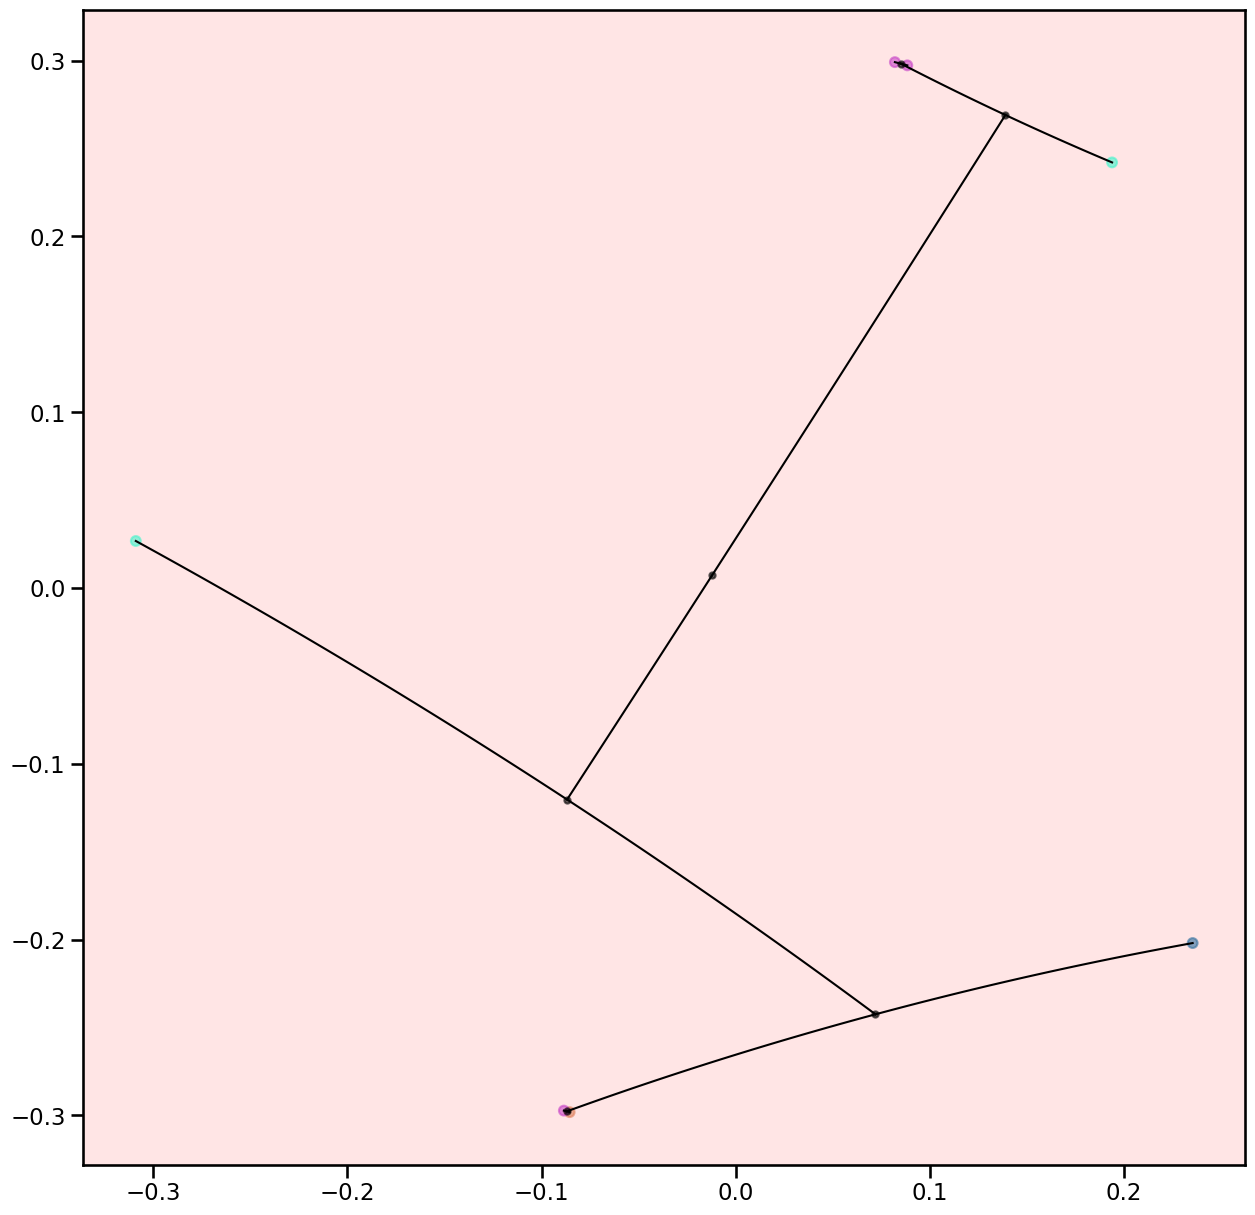

In [7]:
embeddings1,nodes1 = get_Hyper_tree(folder_path1 +'datas.data',1,tmp1.shape[1]+1,0,epoches1,epoches2,meta_list1,save_path=folder_path1)

## rotate and merge

In [8]:
merge_points_with_c(embeddings1,nodes1,folder_path1 +'datas.data',1,tmp1.shape[1]+1,0,folder_path1,epoches2,c1,c2)
nos1 = build_hyper_tree_from_folder(folder_path1,True)
add_meta(nos1[0],meta_list1,[])
show_tree(nos1[0],color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(nos1[0]);

8 3
False
	 Epoch 0 | average train loss1: 0.368715
	 Epoch 0 | average train loss2: 0.353318
	 Epoch 1 | average train loss1: 0.363924
	 Epoch 1 | average train loss2: 0.350996
	 Epoch 2 | average train loss1: 0.364673
	 Epoch 2 | average train loss2: 0.350062
	 Epoch 3 | average train loss1: 0.363595
	 Epoch 3 | average train loss2: 0.348079
	 Epoch 4 | average train loss1: 0.363416
	 Epoch 4 | average train loss2: 0.348102
True
{'Th17': '#184e77', 'CD4Tn': '#1a759f', 'Th2': '#168aad', 'empty': '#fff', 'Tfh': '#52b69a'}


## embedding rotate and merge for dataset2

./datas/demo/2/datas.data length:6
Generating all pairs superset
	 Epoch 0 | average train loss: 0.906712
Optimization finished.
	 Epoch 1 | average train loss: 0.893077
Optimization finished.
	 Epoch 2 | average train loss: 0.892790
Optimization finished.
	 Epoch 3 | average train loss: 0.893479
Optimization finished.
	 Epoch 4 | average train loss: 0.893272
Optimization finished.
	 Epoch 5 | average train loss: 0.895829
Optimization finished.
	 Epoch 6 | average train loss: 0.892609
Optimization finished.
	 Epoch 7 | average train loss: 0.879926
Optimization finished.
	 Epoch 8 | average train loss: 0.883182
Optimization finished.
	 Epoch 9 | average train loss: 0.882777
Optimization finished.
	 Epoch 10 | average train loss: 0.880156
Optimization finished.
	 Epoch 11 | average train loss: 0.879015
Optimization finished.
	 Epoch 12 | average train loss: 0.878725
Optimization finished.
	 Epoch 13 | average train loss: 0.877285
Optimization finished.
	 Epoch 14 | average train loss: 0.

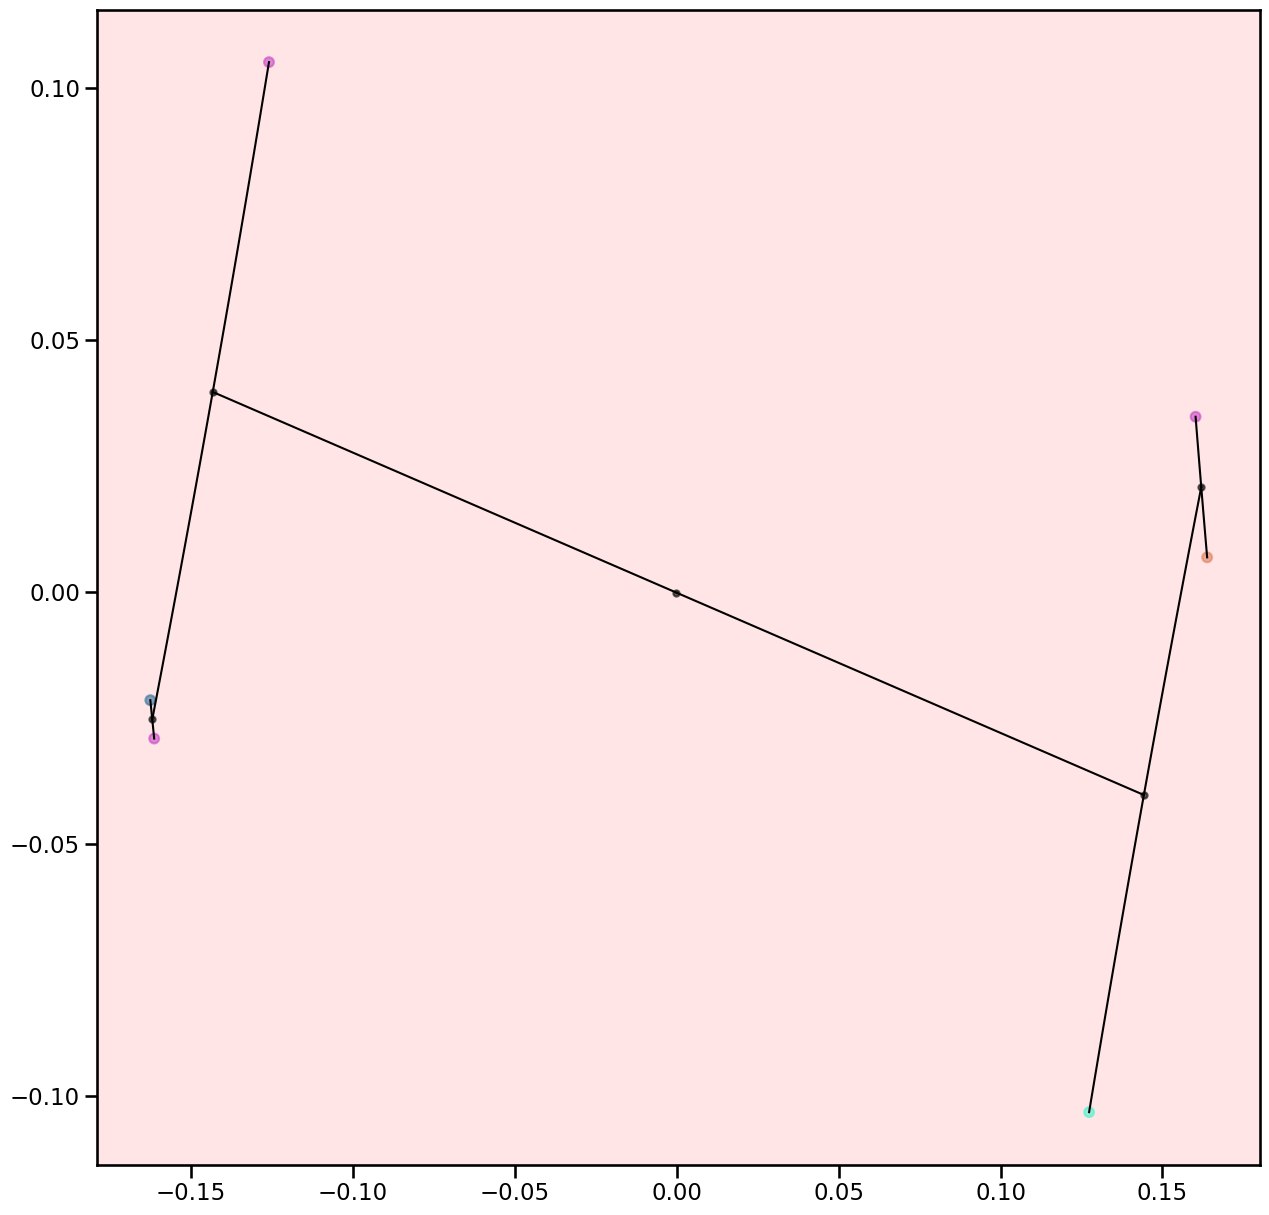

In [9]:
embeddings2,nodes2 = get_Hyper_tree(folder_path2 +'datas.data',1,tmp2.shape[1]+1,0,epoches1,epoches2,meta_list2,save_path=folder_path2)
merge_points_with_c(embeddings2,nodes2,folder_path2 +'datas.data',1,tmp2.shape[1]+1,0,folder_path2,epoches2,c1,c2)
nos2 = build_hyper_tree_from_folder(folder_path2,True)
add_meta(nos2[0],meta_list2,[])
show_tree(nos2[0],color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(nos2[0]);

## do the alignment

In [10]:
nodes1 = build_hyper_tree_from_folder(folder_path1,True)
nodes2 = build_hyper_tree_from_folder(folder_path2,True)

nodes_merge1 = [];
nodes_merge2 = [];
add_meta(nodes1[0],meta_list1,[])
add_meta(nodes2[0],meta_list2,[])


## integer programming

In [11]:
run_alignment_linear(nodes1,nodes2);

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/cf44bf8b13344ce59e4ff375ec62a644-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/cf44bf8b13344ce59e4ff375ec62a644-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 726 COLUMNS
At line 3382 RHS
At line 4104 BOUNDS
At line 4237 ENDATA
Problem MODEL has 721 rows, 132 columns and 2259 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2.03416 - 0.00 seconds
Cgl0004I processed model has 718 rows, 131 columns (131 integer (131 of which binary)) and 2242 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 2.03416
Cbc0038I Before mini branch and bound, 131 integers 

## dynamic programming

In [12]:
rate,anslist,ans = run_alignment(nodes1,nodes2,folder_path1,folder_path2,meta_list1,meta_list2);


The mininum cost for alignment is 9.848484848484848
The alignment edges list is [('12', '10'), ('11', '9'), ('10', '6'), ('5_Tfh', '4_Tfh'), ('4_Th2', '1_CD4Tn'), ('6_Th17', '5_Tfh'), ('9', '8'), ('3_Tfh', '7'), ('1_Tfh', '2_Tfh'), ('2_Th17', '0_Th17')]
{'Th17': '#96f980', 'CD4Tn': '#96cb86', 'Th2': '#9a4d9f', 'empty': '#fff', 'Tfh': '#e15171'}
average cost for one node:0.4281949934123847

cell type rate:0.6


## ATC score

In [13]:
atc = get_atc(ans,nodes1,adata1.copy(),adata2.copy(),inter_gene)
atc

['12', '9', '2_Th17'] ['10', '8', '0_Th17']


[d3blocks] >WARNING> R[write to console]: 载入需要的程辑包：mgcv

[d3blocks] >WARNING> R[write to console]: 载入需要的程辑包：nlme

[d3blocks] >WARNING> R[write to console]: This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.

[d3blocks] >WARNING> R[write to console]: 载入需要的程辑包：genefilter

[d3blocks] >WARNING> R[write to console]: 载入需要的程辑包：BiocParallel



Found 14 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


[d3blocks] >WARNING> R[write to console]: Found2batches

[d3blocks] >WARNING> R[write to console]: Adjusting for0covariate(s) or covariate level(s)

[d3blocks] >WARNING> R[write to console]: Standardizing Data across genes

[d3blocks] >WARNING> R[write to console]: Fitting L/S model and finding priors

[d3blocks] >WARNING> R[write to console]: Finding parametric adjustments

[d3blocks] >WARNING> R[write to console]: Adjusting the Data




['12', '9', '3_Tfh', '1_Tfh'] ['10', '8', '7', '2_Tfh']
Found 17 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


[d3blocks] >WARNING> R[write to console]: Found2batches

[d3blocks] >WARNING> R[write to console]: Adjusting for0covariate(s) or covariate level(s)

[d3blocks] >WARNING> R[write to console]: Standardizing Data across genes

[d3blocks] >WARNING> R[write to console]: Fitting L/S model and finding priors

[d3blocks] >WARNING> R[write to console]: Finding parametric adjustments

[d3blocks] >WARNING> R[write to console]: Adjusting the Data




['12', '11', '6_Th17'] ['10', '9', '5_Tfh']
Found 36 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


[d3blocks] >WARNING> R[write to console]: Found2batches

[d3blocks] >WARNING> R[write to console]: Adjusting for0covariate(s) or covariate level(s)

[d3blocks] >WARNING> R[write to console]: Standardizing Data across genes

[d3blocks] >WARNING> R[write to console]: Fitting L/S model and finding priors

[d3blocks] >WARNING> R[write to console]: Finding parametric adjustments

[d3blocks] >WARNING> R[write to console]: Adjusting the Data




['12', '11', '10'] ['10', '9', '6']
['12', '11', '10', '4_Th2'] ['10', '9', '6', '1_CD4Tn']
Found 18 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


[d3blocks] >WARNING> R[write to console]: Found2batches

[d3blocks] >WARNING> R[write to console]: Adjusting for0covariate(s) or covariate level(s)

[d3blocks] >WARNING> R[write to console]: Standardizing Data across genes

[d3blocks] >WARNING> R[write to console]: Fitting L/S model and finding priors

[d3blocks] >WARNING> R[write to console]: Finding parametric adjustments

[d3blocks] >WARNING> R[write to console]: Adjusting the Data




['12', '11', '10', '5_Tfh'] ['10', '9', '6', '4_Tfh']
Found 19 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


[d3blocks] >WARNING> R[write to console]: Found2batches

[d3blocks] >WARNING> R[write to console]: Adjusting for0covariate(s) or covariate level(s)

[d3blocks] >WARNING> R[write to console]: Standardizing Data across genes

[d3blocks] >WARNING> R[write to console]: Fitting L/S model and finding priors

[d3blocks] >WARNING> R[write to console]: Finding parametric adjustments

[d3blocks] >WARNING> R[write to console]: Adjusting the Data




0.8821480190729526

## chord graph

In [14]:
chord_graph(ans,nodes1,nodes2)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> File not found: [file:////var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/d3blocks/chord.html]
[d3blocks] >INFO> Open browser: file:////var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/d3blocks/chord.html


## 2d graph

In [15]:
show_2d(ans,nodes1,nodes2)


{'Th17': '#184e77', 'CD4Tn': '#1a759f', 'Th2': '#168aad', 'empty': '#fff', 'Tfh': '#52b69a'}


## 3d graph

In [16]:
show_3d(ans,nodes1,nodes2)


{'Th17': '#19ca03', 'CD4Tn': '#5e3dba', 'Th2': '#116e82', 'empty': '#fff', 'Tfh': '#587d74'}
